In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Loading

In [2]:
df=pd.read_csv('DS2_C5_S7_AllRent_Data_Challenge.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,04-04-2016 03:34,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,21-04-2016 20:40,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,14-05-2016 05:44,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,05-06-2016 03:37,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,26-05-2016 05:36,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


In [3]:
df.nunique()

Unnamed: 0         9871
bathrooms            12
bedrooms              8
building_id        3275
created            7892
description        8680
display_address    3233
features           3548
latitude           1632
listing_id         9871
longitude          1169
manager_id         2074
photos             9186
price              1318
street_address     5509
interest_level        3
dtype: int64

In [4]:
df['created']=pd.to_datetime(df['created'])

In [6]:
df['created']=pd.to_datetime(df['created'])

In [5]:
df.head()

,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
0,105408,1.0,0,0f9d07991ba14c82d3d368b72d90270a,2016-04-04 03:34:00,Gorgeous unit in one of the most genuinely cov...,230 Central Park South,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7672,6827153,-73.9802,932589de9230b697808216774fa26bd4,['https://photos.renthop.com/2/6821519_0a14cc2...,2800,230 Central Park South,high
1,110219,1.0,1,564d6f608f41e8d4a5e181c4e068e3d9,2016-04-21 20:40:00,Enormous 1 bedroom apartment in Murray Hill. F...,E 39th St,"['Cats Allowed', 'Dogs Allowed', 'Reduced Fee'...",40.7483,6908998,-73.9741,489ad933197469ae66acd1f7ce18f908,['https://photos.renthop.com/2/6908998_6b00895...,2100,243 E 39th St,high
2,56113,1.0,1,69790fbf0bf7e22b1d0ebc721cf0f633,2016-05-14 05:44:00,"This 1 bedroom, 1 bathroom spacious apartment ...",E 25th St.,"['Elevator', 'Furnished', 'Hardwood Floors']",40.7399,7013774,-73.9812,792c0f1ad1431397c65db3e69b770928,['https://photos.renthop.com/2/7013774_e7ead5d...,3000,217 E 25th St.,high
3,37765,1.0,2,d0234abbc01a982d54e8d446acc03405,2016-05-06 03:37:00,SPECTACULAR2 BEDROOM APARTMENT IN LUXURY 24HR ...,West 34th Street,"['Doorman', 'Elevator', 'Dishwasher', 'Hardwoo...",40.7530,7113518,-73.9958,eb5a6c4c2eb6f3e2a085c477afd5a815,['https://photos.renthop.com/2/7113518_d234153...,3000,360 West 34th Street,high
4,67397,1.0,2,a36895b9975c6991ca0fa1d9a99023a1,2016-05-26 05:36:00,NO FEE.. Newly Reno XL Convertible 2 Br .. Pri...,East 72nd Street,"['Dining Room', 'Doorman', 'Elevator', 'Fitnes...",40.7695,7071666,-73.9603,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/7071666_4f81618...,3300,200 East 72nd Street,high


# Data Exploring

In [6]:
df.shape

(9871, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       9871 non-null   int64         
 1   bathrooms        9871 non-null   float64       
 2   bedrooms         9871 non-null   int64         
 3   building_id      9871 non-null   object        
 4   created          9871 non-null   datetime64[ns]
 5   description      9585 non-null   object        
 6   display_address  9837 non-null   object        
 7   features         9871 non-null   object        
 8   latitude         9871 non-null   float64       
 9   listing_id       9871 non-null   int64         
 10  longitude        9871 non-null   float64       
 11  manager_id       9871 non-null   object        
 12  photos           9871 non-null   object        
 13  price            9871 non-null   int64         
 14  street_address   9866 non-null   object 

In [8]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,9871.000000,9871.000000,9871.000000,9871.000000,9.871000e+03,9871.000000,9871.000000
mean,61828.973154,1.210617,1.533685,40.747167,7.024062e+06,-73.965549,3662.860804
std,35901.607107,0.501985,1.106696,0.414548,1.269108e+05,0.760686,2559.911997
min,9.000000,0.000000,0.000000,0.000000,6.812005e+06,-87.613400,43.000000
25%,30968.000000,1.000000,1.000000,40.727500,6.914494e+06,-73.992200,2499.000000
50%,61354.000000,1.000000,1.000000,40.750600,7.022816e+06,-73.978300,3125.000000
75%,93229.500000,1.000000,2.000000,40.773900,7.130978e+06,-73.955100,4047.500000
max,123995.000000,10.000000,8.000000,43.034600,7.742631e+06,0.000000,90000.000000


In [9]:
df.dtypes

Unnamed: 0                  int64
bathrooms                 float64
bedrooms                    int64
building_id                object
created            datetime64[ns]
description                object
display_address            object
features                   object
latitude                  float64
listing_id                  int64
longitude                 float64
manager_id                 object
photos                     object
price                       int64
street_address             object
interest_level             object
dtype: object

In [10]:
df.isnull().sum()
# there is some null value so we need to treat them before builing ml model

Unnamed: 0           0
bathrooms            0
bedrooms             0
building_id          0
created              0
description        286
display_address     34
features             0
latitude             0
listing_id           0
longitude            0
manager_id           0
photos               0
price                0
street_address       5
interest_level       0
dtype: int64

In [11]:
df.drop(columns=['Unnamed: 0','building_id','created','description','display_address','listing_id','manager_id','photos','street_address'],axis=1,inplace=True)

# Data Preprocessing

# Label encoding

In [11]:
lbl=LabelEncoder()

In [8]:
m=LabelEncoder()

In [9]:
df['features']=m.fit_transform(df['features'])

In [12]:
df['features']=lbl.fit_transform(df['features'])
df['interest_level']=lbl.fit_transform(df['interest_level'])

In [13]:
x=df.drop(columns='interest_level')
y=df['interest_level']

In [15]:
x.nunique()

bathrooms      12
bedrooms        8
features     3548
latitude     1632
longitude    1169
price        1318
dtype: int64

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bathrooms  9871 non-null   float64
 1   bedrooms   9871 non-null   int64  
 2   features   9871 non-null   int32  
 3   latitude   9871 non-null   float64
 4   longitude  9871 non-null   float64
 5   price      9871 non-null   int64  
dtypes: float64(3), int32(1), int64(2)
memory usage: 424.3 KB


In [17]:
x.head()

,bathrooms,bedrooms,features,latitude,longitude,price
0,1.0,0,169,40.7672,-73.9802,2800
1,1.0,1,320,40.7483,-73.9741,2100
2,1.0,1,1599,40.7399,-73.9812,3000
3,1.0,2,959,40.7530,-73.9958,3000
4,1.0,2,656,40.7695,-73.9603,3300


In [18]:
x.isnull().sum()

bathrooms    0
bedrooms     0
features     0
latitude     0
longitude    0
price        0
dtype: int64

# Data Visualization

In [14]:
from tabulate import tabulate

In [16]:
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()>100:
        con.append(i)
    else:
        cat.append(1)
print(tabulate({'category':cat,'contionous':con},headers=['category','continous']))      

  category  continous
----------  ---------------
         1  Unnamed: 0
         1  building_id
         1  created
            description
            display_address
            features
            latitude
            listing_id
            longitude
            manager_id
            photos
            price
            street_address


In [15]:
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()>100:
        con.append(i)
    else:
        cat.append(i)
        
print(tabulate({'category':cat,'contionus':con},headers=['category','continous']))        

category        continous
--------------  ---------------
bathrooms       Unnamed: 0
bedrooms        building_id
interest_level  created
                description
                display_address
                features
                latitude
                listing_id
                longitude
                manager_id
                photos
                price
                street_address


In [19]:
from tabulate import tabulate
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()>100:
        con.append(i)
    else:
        cat.append(i)
        
print(tabulate({'Categorical': cat,"Continuous": con},headers=['Categorical','Continuous']))

Categorical     Continuous
--------------  ------------
bathrooms       features
bedrooms        latitude
interest_level  longitude
                price


## x_train.dtypes

In [20]:
sc=StandardScaler()

In [21]:
#data scaling
x1=x.copy()

x2=sc.fit_transform(x1)
x=pd.DataFrame(x2,columns=x1.columns)
x.head()

,bathrooms,bedrooms,features,latitude,longitude,price
0,-0.41959,-1.385892,-1.684711,0.048326,-0.019261,-0.337084
1,-0.41959,-0.482256,-1.530574,0.002732,-0.011242,-0.610544
2,-0.41959,-0.482256,-0.225001,-0.017532,-0.020576,-0.258952
3,-0.41959,0.421379,-0.878298,0.014071,-0.039770,-0.258952
4,-0.41959,0.421379,-1.187593,0.053875,0.006901,-0.141755


In [22]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9871 entries, 0 to 9870
Series name: interest_level
Non-Null Count  Dtype
--------------  -----
9871 non-null   int32
dtypes: int32(1)
memory usage: 38.7 KB


# Correlation

In [23]:
corr=df.corr()
corr

,bathrooms,bedrooms,features,latitude,longitude,price,interest_level
bathrooms,1.000000,0.528971,-0.023881,0.007422,-0.000629,0.617426,-0.016047
bedrooms,0.528971,1.000000,0.008743,0.015035,-0.008100,0.431208,0.025165
features,-0.023881,0.008743,1.000000,-0.008677,0.016854,-0.042215,-0.004720
latitude,0.007422,0.015035,-0.008677,1.000000,-0.967374,0.005881,0.001149
longitude,-0.000629,-0.008100,0.016854,-0.967374,1.000000,-0.009305,-0.003506
price,0.617426,0.431208,-0.042215,0.005881,-0.009305,1.000000,-0.033093
interest_level,-0.016047,0.025165,-0.004720,0.001149,-0.003506,-0.033093,1.000000


In [24]:
corr.style.background_gradient(cmap='viridis')

,bathrooms,bedrooms,features,latitude,longitude,price,interest_level
bathrooms,1.000000,0.528971,-0.023881,0.007422,-0.000629,0.617426,-0.016047
bedrooms,0.528971,1.000000,0.008743,0.015035,-0.008100,0.431208,0.025165
features,-0.023881,0.008743,1.000000,-0.008677,0.016854,-0.042215,-0.004720
latitude,0.007422,0.015035,-0.008677,1.000000,-0.967374,0.005881,0.001149
longitude,-0.000629,-0.008100,0.016854,-0.967374,1.000000,-0.009305,-0.003506
price,0.617426,0.431208,-0.042215,0.005881,-0.009305,1.000000,-0.033093
interest_level,-0.016047,0.025165,-0.004720,0.001149,-0.003506,-0.033093,1.000000


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

bedroom bathroom is highly correlated

# Model Building

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model_log=LogisticRegression()

# CV

In [20]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,KFold

In [29]:
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3)
n_score=cross_val_score(model_log,x,y,scoring='accuracy',cv=cv,n_jobs=-1)
n_score

array([0.68927126, 0.6899696 , 0.6899696 , 0.69908815, 0.68591692,
       0.69300912, 0.68287741, 0.70010132, 0.68287741, 0.70212766,
       0.68522267, 0.68895643, 0.68490375, 0.6970618 , 0.6899696 ,
       0.69604863, 0.69199595, 0.69402229, 0.69199595, 0.69098278,
       0.68927126, 0.69604863, 0.69098278, 0.69908815, 0.69908815,
       0.6970618 , 0.69199595, 0.67882472, 0.68490375, 0.68591692])

In [30]:
print('RMSE:',n_score.mean())

RMSE: 0.6913183463295447


# Model fit

In [31]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [32]:
y_predict=model_log.predict(x_test)

# Accuracy

In [33]:
model_log.score(x_test,y_test)

0.6934503713706954

In [34]:
model_log.score(x_train,y_train)

0.6924301635547836

# Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Grid CV

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# penalty Type
penalty=['l1','l2'] # l1=Lasso And L2= Ridge (Refularization) l1=0 ,l2= 0.01 (which is near to zero)

c=np.logspace(0,4,10)
c # solution for overfitting

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [38]:
grid_model=GridSearchCV(model_log,param_grid={'C':c,'penalty':penalty})

In [39]:
grid_model.fit(x_train,y_train)

C:\Users\prabh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prabh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prabh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\prabh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [40]:
best=grid_model.best_estimator_
best

LogisticRegression()

In [41]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [42]:
best.fit(x_train,y_train)

LogisticRegression()

In [43]:
yy_prd=best.predict(x_test)

# Accuracy

In [44]:
best.score(x_test,y_test)

0.6934503713706954

In [45]:
best.score(x_train,y_train)

0.6924301635547836

# Best Model Evaluation

In [21]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,yy_prd))

              precision    recall  f1-score   support

           0       0.43      0.01      0.03       218
           1       0.70      0.98      0.82      2065
           2       0.30      0.04      0.06       679

    accuracy                           0.69      2962
   macro avg       0.48      0.34      0.30      2962
weighted avg       0.59      0.69      0.59      2962



In [48]:
prob=best.predict_proba(x_test)

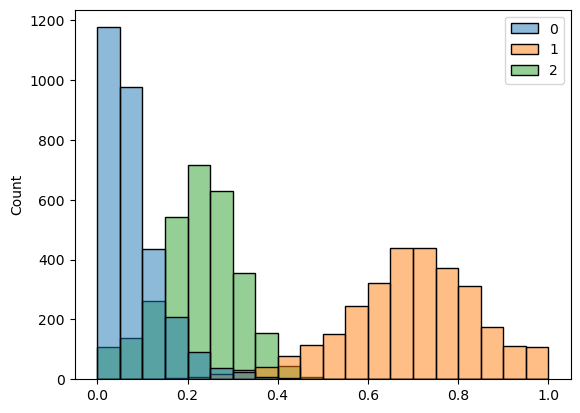

In [49]:
sb.histplot(prob);

In [50]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=42)
score=cross_val_score(DT,x_train,y_train,scoring='accuracy',cv=cv,n_jobs=-1)
print('mean score using DT',score.mean())

mean score using DT 0.6232930640323832


In [51]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei